# Import and Reading of csv



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
mosq_csv = pd.read_csv('/content/drive/MyDrive/CMP466 - Machine Learning/Project/MTM_DISCRIMINATING_CONCENTRATION_BIOASSAY_MOD.csv')

Mounted at /content/drive/


# Preprocessing

In [ ]:
# Verify the class distribution
print("Class distribution before preprocessing:")
print(Counter(mosq_csv['RESISTANCE_STATUS']))

Class distribution before preprocessing:
Counter({'Confirmed resistance': 10112, 'Susceptible': 7568, 'Possible resistance': 2675, 'Undetermined': 719})


In [ ]:
mosq_csv.nunique()

ID                       21074
COUNTRY_NAME                87
ISO2                        86
ADMIN1                     721
ADMIN2                    1913
SITE_NAME                 3782
SITE_CODE                 3793
LATITUDE                  3624
LONGITUDE                 3635
ASSAY_TYPE                   1
TEST_TYPE                    3
INSECTICIDE_CLASS            6
INSECTICIDE_TYPE            18
INSECTICIDE_CONC            18
INSECTICIDE_INTENSITY        1
YEAR_START                  44
SPECIES                     92
STAGE_ORIGIN                 5
MOSQUITO_NUMBER            431
TEST_TIME                    0
MORTALITY_ADJUSTED        1594
RESISTANCE_STATUS            4
DATA_SOURCE                264
CITATION                   660
CITATION_URL               447
DATA_CURATOR                 3
dtype: int64

In [ ]:
labelsX = ['COUNTRY_NAME', 'INSECTICIDE_CLASS','ADMIN1','ADMIN2','SITE_NAME','TEST_TYPE','INSECTICIDE_TYPE','INSECTICIDE_CONC', 'MOSQUITO_NUMBER','SPECIES']

mosq_csv_ = mosq_csv[labelsX + ['RESISTANCE_STATUS']]
# mosq_csv_Y=mosq_csv['RESISTANCE_STATUS']

print(mosq_csv_.nunique())
# print(mosq_csv_Y.nunique())

COUNTRY_NAME           87
INSECTICIDE_CLASS       6
ADMIN1                721
ADMIN2               1913
SITE_NAME            3782
TEST_TYPE               3
INSECTICIDE_TYPE       18
INSECTICIDE_CONC       18
MOSQUITO_NUMBER       431
SPECIES                92
RESISTANCE_STATUS       4
dtype: int64


In [ ]:
mosq_csv_ = mosq_csv_.replace(['', 'Not available', 'Undetermined'],np.NaN)

In [ ]:
mosq_csv_.count()

COUNTRY_NAME         21074
INSECTICIDE_CLASS    21074
ADMIN1               21018
ADMIN2               21018
SITE_NAME            21074
TEST_TYPE            21074
INSECTICIDE_TYPE     21074
INSECTICIDE_CONC     21074
MOSQUITO_NUMBER      18620
SPECIES              21074
RESISTANCE_STATUS    20355
dtype: int64

In [ ]:
mosq_csv_.isnull().sum()

COUNTRY_NAME            0
INSECTICIDE_CLASS       0
ADMIN1                 56
ADMIN2                 56
SITE_NAME               0
TEST_TYPE               0
INSECTICIDE_TYPE        0
INSECTICIDE_CONC        0
MOSQUITO_NUMBER      2454
SPECIES                 0
RESISTANCE_STATUS     719
dtype: int64

In [ ]:
mosq_csv_ = mosq_csv_.dropna()
mosq_csv_.dtypes

COUNTRY_NAME         object
INSECTICIDE_CLASS    object
ADMIN1               object
ADMIN2               object
SITE_NAME            object
TEST_TYPE            object
INSECTICIDE_TYPE     object
INSECTICIDE_CONC     object
MOSQUITO_NUMBER      object
SPECIES              object
RESISTANCE_STATUS    object
dtype: object

In [ ]:
mosq_csv_.count()

COUNTRY_NAME         17880
INSECTICIDE_CLASS    17880
ADMIN1               17880
ADMIN2               17880
SITE_NAME            17880
TEST_TYPE            17880
INSECTICIDE_TYPE     17880
INSECTICIDE_CONC     17880
MOSQUITO_NUMBER      17880
SPECIES              17880
RESISTANCE_STATUS    17880
dtype: int64

In [ ]:
mosq_csv_.isnull().sum()

COUNTRY_NAME         0
INSECTICIDE_CLASS    0
ADMIN1               0
ADMIN2               0
SITE_NAME            0
TEST_TYPE            0
INSECTICIDE_TYPE     0
INSECTICIDE_CONC     0
MOSQUITO_NUMBER      0
SPECIES              0
RESISTANCE_STATUS    0
dtype: int64

In [ ]:
# Verify the class distribution
print("Class distribution after preprocessing:")
print(Counter(mosq_csv_['RESISTANCE_STATUS']))

Class distribution after preprocessing:
Counter({'Confirmed resistance': 8918, 'Susceptible': 6649, 'Possible resistance': 2313})


# Creating two datasets: With ranges(took the median) and Without ranges(removed the ranges)

In [ ]:
ranges_mosq = mosq_csv_.copy()

# Filter rows with ~100 and ranges
selected_rows = mosq_csv_[
    mosq_csv_['MOSQUITO_NUMBER'].str.startswith('~') | mosq_csv_['MOSQUITO_NUMBER'].str.contains('-')
]

# Process ~100 values and ranges
selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('~', '')  # Remove ~ from ~100
selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('-', ' ').astype(str)  # Replace '-' with ' '
selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.split().apply(lambda x: sum(map(float, x))/len(x))  # Calculate median for ranges

# Update the original DataFrame with the processed rows
ranges_mosq['MOSQUITO_NUMBER'].update(selected_rows['MOSQUITO_NUMBER'])

<ipython-input-13-abd3d9f74844>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('~', '')  # Remove ~ from ~100
<ipython-input-13-abd3d9f74844>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('-', ' ').astype(str)  # Replace '-' with ' '
<ipython-input-13-abd3d9f74844>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
print("\nDataframe with ranges:")
print(ranges_mosq['MOSQUITO_NUMBER'].tail(5))
print(ranges_mosq.count())


Dataframe with ranges:
21069    100
21070    100
21071     48
21072     40
21073     40
Name: MOSQUITO_NUMBER, dtype: object
COUNTRY_NAME         17880
INSECTICIDE_CLASS    17880
ADMIN1               17880
ADMIN2               17880
SITE_NAME            17880
TEST_TYPE            17880
INSECTICIDE_TYPE     17880
INSECTICIDE_CONC     17880
MOSQUITO_NUMBER      17880
SPECIES              17880
RESISTANCE_STATUS    17880
dtype: int64


In [ ]:
# Check which rows contain 'µg' in the INSECTICIDE_CONC column
contains_microgram_r = ranges_mosq['INSECTICIDE_CONC'].str.contains('µg')

# Invert the boolean mask to select rows that do not contain 'µg'
rows_to_keep_r = ~contains_microgram_r

# Filter the DataFrame to keep only the rows without 'µg' in the INSECTICIDE_CONC column
ranges_mosq = ranges_mosq[rows_to_keep_r]

In [ ]:
def convert_percentage_to_number(percentage):
    if pd.isna(percentage):  # Check if the value is NaN
        return None
    else:
        return float(percentage.strip('%')) / 100  # Convert percentage to number

# Apply the function to the 'INSECTICIDE_CONC' column
ranges_mosq['INSECTICIDE_CONC'] = ranges_mosq['INSECTICIDE_CONC'].apply(convert_percentage_to_number)

<ipython-input-16-88eabf249006>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranges_mosq['INSECTICIDE_CONC'] = ranges_mosq['INSECTICIDE_CONC'].apply(convert_percentage_to_number)


In [ ]:
print(ranges_mosq['INSECTICIDE_CONC'].head(20))

0     0.0010
2     0.0005
4     0.0005
8     0.0005
9     0.0400
11    0.0005
12    0.0010
13    0.0075
14    0.0075
15    0.0075
18    0.0400
20    0.0075
23    0.0400
24    0.0005
26    0.0050
27    0.0400
28    0.0100
29    0.0500
30    0.0400
31    0.0005
Name: INSECTICIDE_CONC, dtype: float64


In [ ]:
ranges_mosq['MOSQUITO_NUMBER'] = ranges_mosq['MOSQUITO_NUMBER'].astype('float64')
ranges_mosq['INSECTICIDE_CONC'] = ranges_mosq['INSECTICIDE_CONC'].astype('float64')

<ipython-input-18-03b3d96ad2ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranges_mosq['MOSQUITO_NUMBER'] = ranges_mosq['MOSQUITO_NUMBER'].astype('float64')
<ipython-input-18-03b3d96ad2ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranges_mosq['INSECTICIDE_CONC'] = ranges_mosq['INSECTICIDE_CONC'].astype('float64')


In [ ]:
ranges_mosq.dtypes

COUNTRY_NAME          object
INSECTICIDE_CLASS     object
ADMIN1                object
ADMIN2                object
SITE_NAME             object
TEST_TYPE             object
INSECTICIDE_TYPE      object
INSECTICIDE_CONC     float64
MOSQUITO_NUMBER      float64
SPECIES               object
RESISTANCE_STATUS     object
dtype: object

- Removing MORTALITY_ADJUSTED range values
- Removing NaNs and Not Availables
- Removing ug values from INSECTICIDE_CONC

MORTALITY_ADJUSTED RANGE TYPICALLY
1. 98 to 100 = Susceptible
2. 90 to 98 = Possible Resistance
3. Remaining is Confirmed Resistance

DATASET
- With ranges in MOSQUITO_NUMBER
- Without ranges in MOSQUITO_NUMBER

# Encoding & Oversampling

In [ ]:
def encode_categorical_columns(df, columns):
    encoders = {}
    for column in columns:
        encoder = LabelEncoder()
        encoded_values = encoder.fit_transform(df[column])
        df[column] = encoded_values
        encoders[column] = encoder
    return df, encoders

In [ ]:
columns_to_encode = ['RESISTANCE_STATUS','COUNTRY_NAME', 'INSECTICIDE_CLASS','ADMIN1','ADMIN2','SITE_NAME','INSECTICIDE_TYPE','SPECIES', 'TEST_TYPE']

ranges_mosq, encoders_r = encode_categorical_columns(ranges_mosq.copy(), columns_to_encode)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import pandas as pd

# Calculate the number of samples in class 0
class_0_count = len(ranges_mosq[ranges_mosq['RESISTANCE_STATUS'] == 0])

# Calculate the number of samples in class 2
class_2_count = len(ranges_mosq[ranges_mosq['RESISTANCE_STATUS'] == 2])

# Define the oversampling strategy for class 1
oversample_strategy = {1: class_2_count}

# Define the undersampling strategy for class 0
undersample_strategy = {0: class_2_count}

# Define the SMOTE object
oversampler = SMOTE(sampling_strategy=oversample_strategy)

# Define the RandomUnderSampler object
undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Define the pipeline
pipeline = Pipeline([
    ('under', undersampler),
    ('over', oversampler),
])

# Apply the pipeline to the dataframe
X_resampled, y_resampled = pipeline.fit_resample(ranges_mosq.drop(columns=['RESISTANCE_STATUS']), ranges_mosq['RESISTANCE_STATUS'])

# Combine X_resampled and y_resampled into a new DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['RESISTANCE_STATUS'])], axis=1)

# Verify the class distribution
print("Class distribution after resampling:")
print(Counter(resampled_df['RESISTANCE_STATUS']))

Class distribution after resampling:
Counter({0: 6118, 1: 6118, 2: 6118})


# Seperating Values_mosq & Ranges_mosq into target and predictor dataframes

In [ ]:
labelsX = ['COUNTRY_NAME', 'INSECTICIDE_CLASS','ADMIN1','ADMIN2','SITE_NAME','INSECTICIDE_TYPE','INSECTICIDE_CONC', 'MOSQUITO_NUMBER','SPECIES', 'TEST_TYPE']

ranges_mosq_X = resampled_df[labelsX]
ranges_mosq_Y=resampled_df['RESISTANCE_STATUS']

In [ ]:
print(ranges_mosq_X.nunique())
print(ranges_mosq_Y.nunique())

COUNTRY_NAME           81
INSECTICIDE_CLASS       4
ADMIN1                651
ADMIN2               1680
SITE_NAME            3207
INSECTICIDE_TYPE       15
INSECTICIDE_CONC     2505
MOSQUITO_NUMBER      3330
SPECIES                86
TEST_TYPE               2
dtype: int64
3


In [ ]:
ranges_mosq_X.describe()

,COUNTRY_NAME,INSECTICIDE_CLASS,ADMIN1,ADMIN2,SITE_NAME,INSECTICIDE_TYPE,INSECTICIDE_CONC,MOSQUITO_NUMBER,SPECIES,TEST_TYPE
count,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000
mean,42.714231,2.133213,321.208238,859.369620,1591.457938,6.922306,0.011890,97.452289,31.074589,0.999837
std,23.585343,1.106129,177.863166,473.017854,919.739422,3.575978,0.017034,82.842710,21.316667,0.012784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,11.000000,0.000000,0.000000
25%,26.000000,1.000000,170.000000,467.000000,797.250000,5.000000,0.000500,75.000000,14.000000,1.000000
50%,40.000000,3.000000,322.000000,831.000000,1568.000000,6.000000,0.001000,100.000000,29.000000,1.000000
75%,67.000000,3.000000,469.000000,1273.000000,2363.000000,10.000000,0.010000,100.000000,34.000000,1.000000
max,80.000000,3.000000,650.000000,1686.000000,3250.000000,14.000000,0.050000,2502.000000,85.000000,1.000000


In [ ]:
ranges_mosq_Y.describe()

count    18354.000000
mean         1.000000
std          0.816519
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: RESISTANCE_STATUS, dtype: float64

# Scaling

In [ ]:
# Select the columns to be normalized
columns_to_normalize = ['INSECTICIDE_CONC', 'MOSQUITO_NUMBER']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
ranges_mosq_X[columns_to_normalize] = scaler.fit_transform(ranges_mosq_X[columns_to_normalize])

<ipython-input-27-e5c956e35451>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranges_mosq_X[columns_to_normalize] = scaler.fit_transform(ranges_mosq_X[columns_to_normalize])


In [ ]:
ranges_mosq_X.describe()

,COUNTRY_NAME,INSECTICIDE_CLASS,ADMIN1,ADMIN2,SITE_NAME,INSECTICIDE_TYPE,INSECTICIDE_CONC,MOSQUITO_NUMBER,SPECIES,TEST_TYPE
count,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000
mean,42.714231,2.133213,321.208238,859.369620,1591.457938,6.922306,0.230108,0.034706,31.074589,0.999837
std,23.585343,1.106129,177.863166,473.017854,919.739422,3.575978,0.344123,0.033257,21.316667,0.012784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.000000,170.000000,467.000000,797.250000,5.000000,0.000000,0.025692,14.000000,1.000000
50%,40.000000,3.000000,322.000000,831.000000,1568.000000,6.000000,0.010101,0.035729,29.000000,1.000000
75%,67.000000,3.000000,469.000000,1273.000000,2363.000000,10.000000,0.191919,0.035729,34.000000,1.000000
max,80.000000,3.000000,650.000000,1686.000000,3250.000000,14.000000,1.000000,1.000000,85.000000,1.000000


# Class Divisions

Class Distribution (Counts):
RESISTANCE_STATUS
0    6118
1    6118
2    6118
Name: count, dtype: int64

Class Distribution (Percentage):
RESISTANCE_STATUS
0    33.333333
1    33.333333
2    33.333333
Name: proportion, dtype: float64


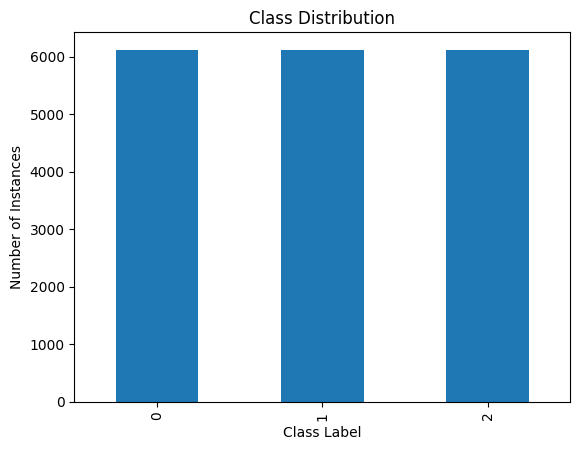

In [ ]:
# Display the distribution of the target variable in counts
class_distribution = ranges_mosq_Y.value_counts()
print("Class Distribution (Counts):")
print(class_distribution)

# Display the distribution of the target variable in percentages
class_distribution_percentage = ranges_mosq_Y.value_counts(normalize=True) * 100
print("\nClass Distribution (Percentage):")
print(class_distribution_percentage)

import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', title='Class Distribution')
plt.ylabel('Number of Instances')
plt.xlabel('Class Label')
plt.show()

# Training ranges_csv


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

def evaluate_multiclass_model(model, X_test, y_test):
    if hasattr(model, 'predict_proba'):
        # If the model has predict_proba method, it's a probabilistic classifier
        y_prob = model.predict_proba(X_test)
    else:
        # Otherwise, use decision function for probabilistic score
        y_prob = model.decision_function(X_test)

    y_pred = model.predict(X_test)
    n_classes = len(np.unique(y_test))

    # Compute one-hot encoding for y_test and y_pred
    y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_one_hot = label_binarize(y_pred, classes=np.unique(y_test))

    # Compute multiclass AUC-ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    tpr_macro = np.zeros_like(fpr_macro)
    for i in range(n_classes):
        tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
    tpr_macro /= n_classes
    roc_auc_macro = auc(fpr_macro, tpr_macro)

    # Compute accuracy, F1-score, precision, recall, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC ROC (Macro)': roc_auc_macro,
        'AUC ROC (Per Class)': roc_auc,
        'ROC Curve (Macro)': (fpr_macro, tpr_macro),
        'Confusion Matrix': conf_matrix
    }


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42, stratify=ranges_mosq_Y)

In [ ]:
dt_params = {'max_depth': list(range(1,30,4)), 'min_samples_leaf': list(range(1,10,2)), 'min_samples_split': list(range(2,10,2))}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, verbose = 10, n_jobs=-1)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 9, 13, 17, 21, 25, 29],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=10)

In [ ]:
# KNN
knn_params = {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']})

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

# Model evaluation for ranges_csv

In [ ]:
best_dt_model = dt_grid.best_estimator_
feature_importances = best_dt_model.feature_importances_
n_features = X_train.shape[1]
for i in range(n_features):
    print(f"Feature {i}: Importance: {feature_importances[i]}")

# # Additionally, you can access the feature importances for each tree in the grid search
# for i, tree in enumerate(dt_grid.best_estimator_.estimators_):
#     print(f"Tree {i+1} - Information Gain:")
#     for j in range(n_features):
#         print(f"  Feature {j}: Importance: {tree.feature_importances_[j]}")


Feature 0: Importance: 0.23897267425687244
Feature 1: Importance: 0.08783566802599602
Feature 2: Importance: 0.10810790075462294
Feature 3: Importance: 0.0
Feature 4: Importance: 0.05274505377921112
Feature 5: Importance: 0.05316565228695716
Feature 6: Importance: 0.0541099246994271
Feature 7: Importance: 0.056280841518693524
Feature 8: Importance: 0.08506014575009777
Feature 9: Importance: 0.26372213892812185


In [ ]:
knn_best_params = knn_grid.best_params_
print(f"KNN best params: {knn_best_params}")
knn_evaluation = evaluate_multiclass_model(knn_grid.best_estimator_, X_test, y_test)
print("KNN Evaluation:", knn_evaluation)

KNN best params: {'n_neighbors': 19, 'weights': 'distance'}
KNN Evaluation: {'Accuracy': 0.6330184966548603, 'F1 Score': 0.517303532135961, 'Precision': 0.5253986644077998, 'Recall': 0.5153470251473393, 'AUC ROC (Macro)': 0.7277351835882537, 'AUC ROC (Per Class)': {0: 0.7836404071733276, 1: 0.6153882038523055, 2: 0.7837994241592953}, 'ROC Curve (Macro)': (array([0.        , 0.01153846, 0.01201109, ..., 0.88746496, 0.89347217,
       1.        ]), array([0.        , 0.06249504, 0.06654143, ..., 0.96455772, 0.96607795,
       1.        ])), 'Confusion Matrix': array([[2006,  189,  390],
       [ 339,  114,  209],
       [ 567,  171, 1097]])}


In [ ]:
nb_best_params = nb_scores
print(f"Naive Bayes best params: {nb_best_params}")
nb_evaluation = evaluate_multiclass_model(nb_model, X_test, y_test)
print("Naive Bayes Evaluation:", nb_evaluation)

Naive Bayes best params: [0.53372681 0.53161889 0.53732602 0.54660481 0.5250949 ]
Naive Bayes Evaluation: {'Accuracy': 0.5411255411255411, 'F1 Score': 0.36608874976309264, 'Precision': 0.34959467598692306, 'Recall': 0.39450684009788883, 'AUC ROC (Macro)': 0.5863257550473076, 'AUC ROC (Per Class)': {0: 0.60900608776954, 1: 0.5332013574660633, 2: 0.6163555711455302}, 'ROC Curve (Macro)': (array([0.00000000e+00, 4.00480577e-04, 6.15953188e-04, ...,
       9.99321267e-01, 9.99547511e-01, 1.00000000e+00]), array([9.43075846e-04, 1.07202491e-03, 1.61698404e-03, ...,
       9.99496475e-01, 1.00000000e+00, 1.00000000e+00])), 'Confusion Matrix': array([[1993,    0,  592],
       [ 435,    0,  227],
       [1078,    0,  757]])}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#### THIS
#
#
#
#
#
print(f"Decision Tree best params: {dt_grid.best_params_}")
dt_evaluation_r= evaluate_multiclass_model(dt_grid.best_estimator_, X_test, y_test)
print("Decision Tree Evaluation:", dt_evaluation_r)

Decision Tree best params: {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Evaluation: {'Accuracy': 0.7146792601338056, 'F1 Score': 0.5783250222646815, 'Precision': 0.5983537473821448, 'Recall': 0.5768380051747238, 'AUC ROC (Macro)': 0.7576652267208422, 'AUC ROC (Per Class)': {0: 0.8276758415708134, 1: 0.6292161077770639, 2: 0.8160862804399618}, 'ROC Curve (Macro)': (array([0.        , 0.03235294, 0.03257919, 0.03325792, 0.03348416,
       0.03461538, 0.03484163, 0.03506787, 0.03529412, 0.03959276,
       0.04117647, 0.04253394, 0.04298643, 0.04321267, 0.04343891,
       0.04479638, 0.05112411, 0.05174007, 0.05226244, 0.052664  ,
       0.05316742, 0.05384615, 0.05420388, 0.05574376, 0.05605174,
       0.05633484, 0.05666769, 0.05723982, 0.05728365, 0.0578996 ,
       0.05943948, 0.06005544, 0.06036341, 0.06097937, 0.06153846,
       0.0619033 , 0.0631352 , 0.06487785, 0.06559901, 0.06621497,
       0.06628959, 0.06647978, 0.06768122, 0.0678733 , 0.068678

In [ ]:
clf_initial = DecisionTreeClassifier(random_state=42)
clf_initial.fit(X_train, y_train)
y_pred_initial = clf_initial.predict(X_test)
print("Initial Model Performance:")
print(classification_report(y_test, y_pred_initial))

Initial Model Performance:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2585
           1       0.27      0.29      0.28       662
           2       0.71      0.69      0.70      1835

    accuracy                           0.69      5082
   macro avg       0.59      0.59      0.59      5082
weighted avg       0.69      0.69      0.69      5082



In [ ]:
# Print indices and hyperparameters
print("Indices of unique models:", unique_top_model_indices)
print("Hyperparameters of unique models:")
for idx in unique_top_model_indices:
    print(results['params'][idx])

Indices of unique models: [480, 264, 268, 263, 267]
Hyperparameters of unique models:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 6}
{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 9}
{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [ ]:
# Initialize set for unique hyperparameters
unique_hyperparameters = set()

# Initialize list for unique top models based on mean test score
unique_top_model_indices = []

# Set a threshold for minimum difference in performance to consider
performance_threshold = 0.0001  # e.g., 1% difference


# Get the results of the grid search
results = dt_grid.cv_results_

# Get the sorted scores and indices
sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'][sorted_indices]

# Loop over sorted scores and indices to find unique top models
# Loop over sorted scores and indices to find unique top models
for idx, score in zip(sorted_indices, sorted_scores):
    params = results['params'][idx]
    # Convert hyperparameters to a frozenset for uniqueness checking
    params_frozen = frozenset(params.items())
    # Check if this combination of hyperparameters is unique and differs from the next by the threshold
    if params_frozen not in unique_hyperparameters and \
       (len(unique_top_model_indices) == 0 or score <= sorted_scores[unique_top_model_indices[-1]] - performance_threshold):
        unique_hyperparameters.add(params_frozen)
        unique_top_model_indices.append(idx)
        # Break if we have found the desired number of unique models
        if len(unique_top_model_indices) >= 5:
            break


# Now unique_top_model_indices contains indices of unique models
# Continue with your plotting code using unique_top_model_indices


In [ ]:
dt_best_params_r = dt_grid.best_params_
print(f"Decision Tree best params: {dt_best_params_r}")
print("Decision Tree Evaluation:", dt_evaluation_r)

Decision Tree best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Evaluation: {'Accuracy': 0.7014954742227469, 'F1 Score': 0.5487931256153927, 'Precision': 0.5783683928796226, 'Recall': 0.5527109447908745, 'AUC ROC (Macro)': 0.7679371588665191, 'AUC ROC (Per Class)': {0: 0.8272353903988461, 1: 0.6606763748957636, 2: 0.8158861376126694}, 'ROC Curve (Macro)': (array([0.        , 0.01085973, 0.01131222, 0.01176471, 0.01447964,
       0.01561086, 0.01674208, 0.01696833, 0.01742081, 0.02082499,
       0.02094241, 0.02186634, 0.02242691, 0.02309824, 0.02362835,
       0.0237142 , 0.02433015, 0.02533937, 0.02556206, 0.0260181 ,
       0.02617801, 0.02647059, 0.02648599, 0.02763316, 0.02802587,
       0.02864182, 0.02923508, 0.030837  , 0.03326147, 0.03356945,
       0.03461538, 0.03484181, 0.03603326, 0.03642534, 0.03644373,
       0.03664921, 0.03844614, 0.03880505, 0.04095023, 0.04096089,
       0.04157684, 0.04321267, 0.04366516, 0.04405286, 0.047736

Model 1 Metrics:
   F1 Score: 0.6969
   Testing Accuracy: 0.6973
   Training Accuracy: 0.8507
   Hyperparameters: {'max_depth': 17, 'min_samples_leaf': 3, 'min_samples_split': 6}
Model 2 Metrics:
   F1 Score: 0.6829
   Testing Accuracy: 0.6833
   Training Accuracy: 0.7831
   Hyperparameters: {'max_depth': 17, 'min_samples_leaf': 9, 'min_samples_split': 8}
Model 3 Metrics:
   F1 Score: 0.6428
   Testing Accuracy: 0.6464
   Training Accuracy: 0.6888
   Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 8}
Model 4 Metrics:
   F1 Score: 0.6432
   Testing Accuracy: 0.6468
   Training Accuracy: 0.6898
   Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6}
Model 5 Metrics:
   F1 Score: 0.6447
   Testing Accuracy: 0.6484
   Training Accuracy: 0.6906
   Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


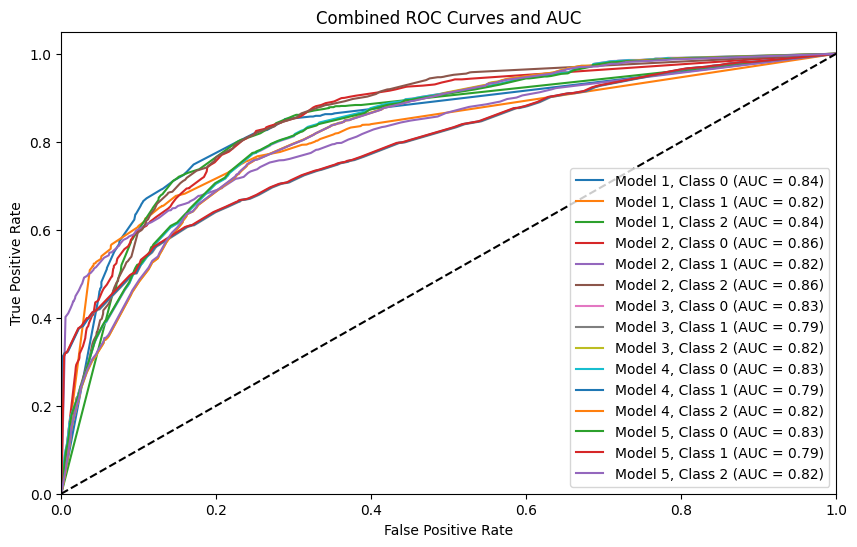

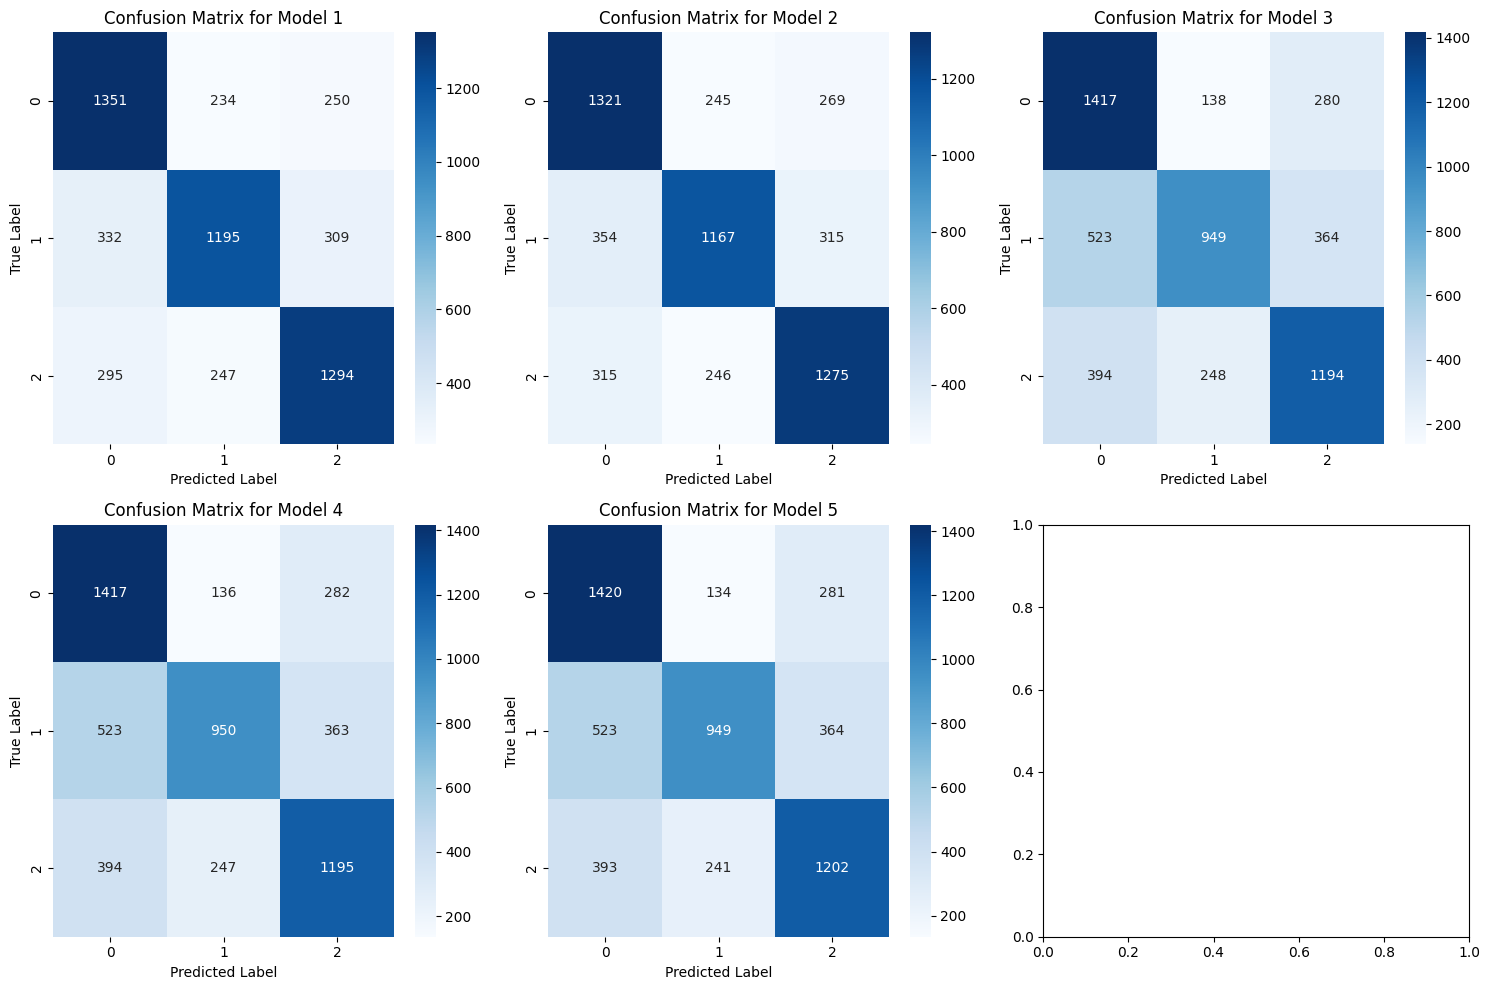

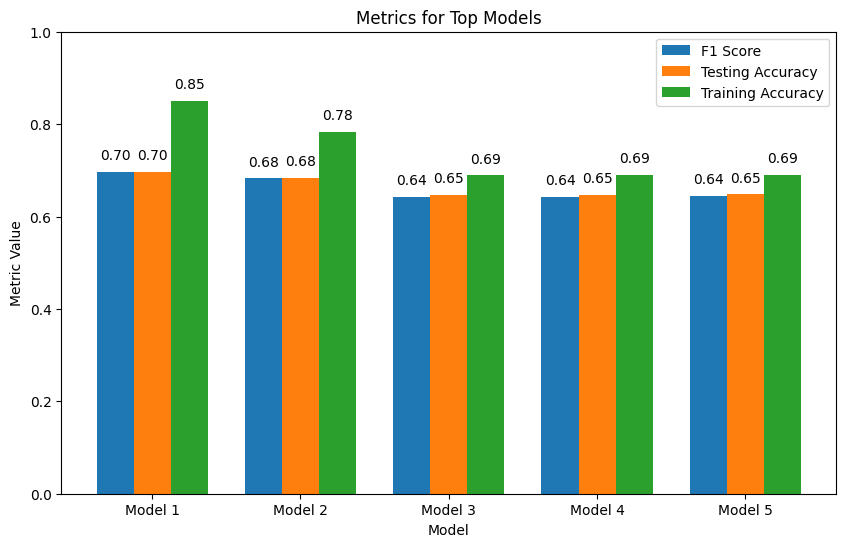

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Initialize subplots for ROC curve and AUC
fig_roc_auc, ax_roc_auc = plt.subplots(figsize=(10, 6))

# Initialize subplots for individual confusion matrices
fig_cm, axes_cm = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Initialize subplots for bar graph with F1 score, testing accuracy, and training accuracy
fig_metrics, ax_metrics = plt.subplots(figsize=(10, 6))

# Lists to store metrics
f1_scores, test_accuracies, train_accuracies = [], [], []

# Print hyperparameters for each model
for i, idx in enumerate(unique_top_model_indices):
    # Get the hyperparameters for the current model
    params = results['params'][idx]

    # Clone the model and set the parameters
    model = clone(dt_grid.best_estimator_).set_params(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)

    # ROC Curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for class_idx in range(len(model.classes_)):
        fpr[class_idx], tpr[class_idx], _ = roc_curve(y_test == model.classes_[class_idx], y_test_proba[:, class_idx])
        roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

    # Plotting individual ROC Curves
    for class_idx in range(len(model.classes_)):
        ax_roc_auc.plot(fpr[class_idx], tpr[class_idx], label=f'Model {i + 1}, Class {class_idx} (AUC = {roc_auc[class_idx]:.2f})')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Plotting Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes_cm[i//3, i%3])
    axes_cm[i//3, i%3].set_title(f"Confusion Matrix for Model {i + 1}")
    axes_cm[i//3, i%3].set_xlabel('Predicted Label')
    axes_cm[i//3, i%3].set_ylabel('True Label')

    # Calculate and store F1 score, testing accuracy, and training accuracy
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, model.predict(X_train))

    f1_scores.append(f1)
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

    # Print metrics and hyperparameters
    print(f"Model {i + 1} Metrics:")
    print(f"   F1 Score: {f1:.4f}")
    print(f"   Testing Accuracy: {test_acc:.4f}")
    print(f"   Training Accuracy: {train_acc:.4f}")
    print(f"   Hyperparameters: {params}")
    print("=" * 50)

# Adjust layout for ROC Curve and AUC
ax_roc_auc.plot([0, 1], [0, 1], 'k--')
ax_roc_auc.set_xlim([0.0, 1.0])
ax_roc_auc.set_ylim([0.0, 1.05])
ax_roc_auc.set_xlabel('False Positive Rate')
ax_roc_auc.set_ylabel('True Positive Rate')
ax_roc_auc.set_title('Combined ROC Curves and AUC')
ax_roc_auc.legend(loc="lower right")

# Adjust layout for Confusion Matrices
fig_cm.tight_layout()

# Bar graph with F1 score, testing accuracy, and training accuracy
models = [f'Model {i + 1}' for i in range(len(unique_top_model_indices))]
bar_width = 0.25
index = np.arange(len(models))

ax_metrics.bar(index, f1_scores, width=bar_width, label='F1 Score')
ax_metrics.bar(index + bar_width, test_accuracies, width=bar_width, label='Testing Accuracy')
ax_metrics.bar(index + 2 * bar_width, train_accuracies, width=bar_width, label='Training Accuracy')

# Add exact numbers on the bars
for i, value in enumerate(f1_scores):
    ax_metrics.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(test_accuracies):
    ax_metrics.text(i + bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(train_accuracies):
    ax_metrics.text(i + 2 * bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

ax_metrics.set_xticks(index + bar_width)
ax_metrics.set_xticklabels(models)
ax_metrics.set_ylim([0, 1])
ax_metrics.set_xlabel('Model')
ax_metrics.set_ylabel('Metric Value')
ax_metrics.set_title('Metrics for Top Models')
ax_metrics.legend()

# Show all plots
plt.show()

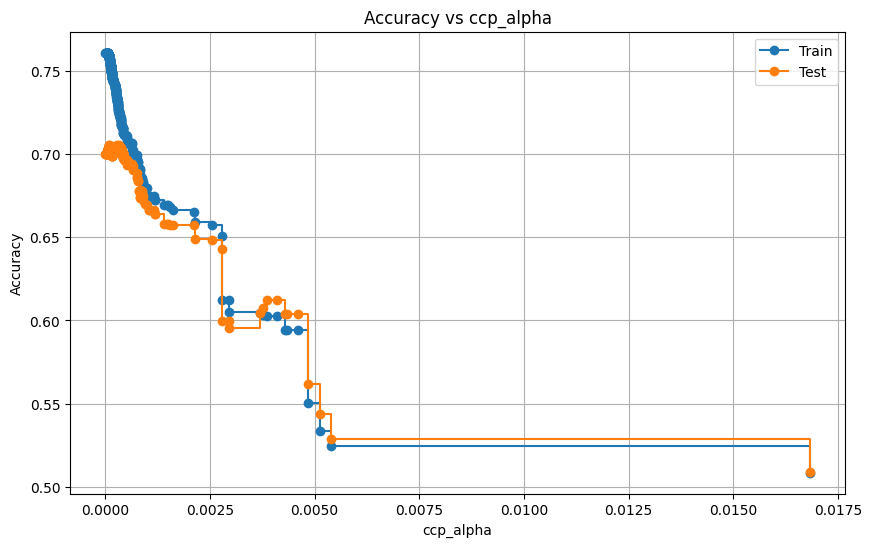

In [ ]:
# 3. Pruning using different ccp_alpha values
best_tree=dt_grid.best_estimator_
path = best_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, **dt_grid.best_params_)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Visualize the performance with different ccp_alpha values
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
optimal_ccp_alpha=0.0
clf_final = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha, **dt_grid.best_params_)
clf_final.fit(X_train, y_train)
y_pred_final = clf_final.predict(X_test)

In [ ]:
print("Final Model Performance:")
print(classification_report(y_test, y_pred_final))

Final Model Performance:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      2585
           1       0.29      0.11      0.16       662
           2       0.71      0.68      0.69      1835

    accuracy                           0.70      5082
   macro avg       0.57      0.55      0.55      5082
weighted avg       0.66      0.70      0.67      5082



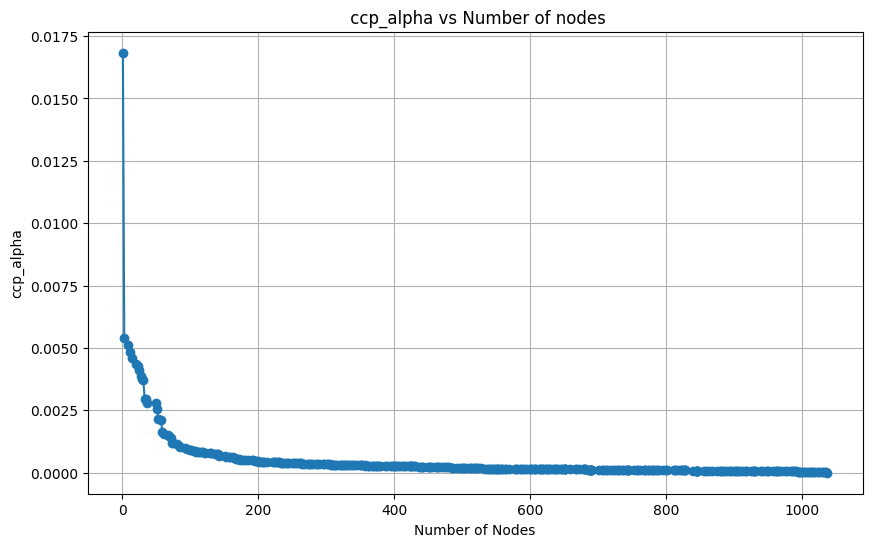

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

best_tree = dt_grid.best_estimator_
path = best_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
node_counts = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, **dt_grid.best_params_)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)

# Visualize the relationship between number of nodes and ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(node_counts, ccp_alphas, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("ccp_alpha")
plt.title(" ccp_alpha vs Number of nodes")
plt.grid(True)
plt.show()


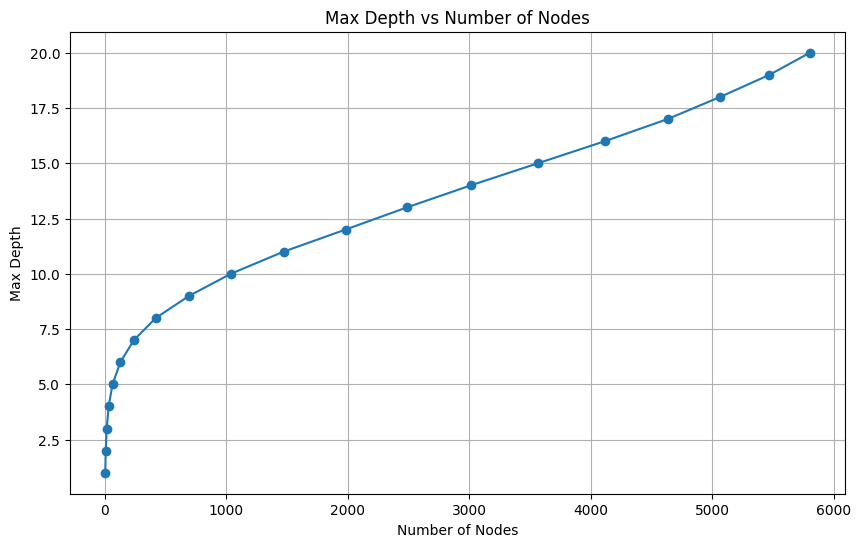

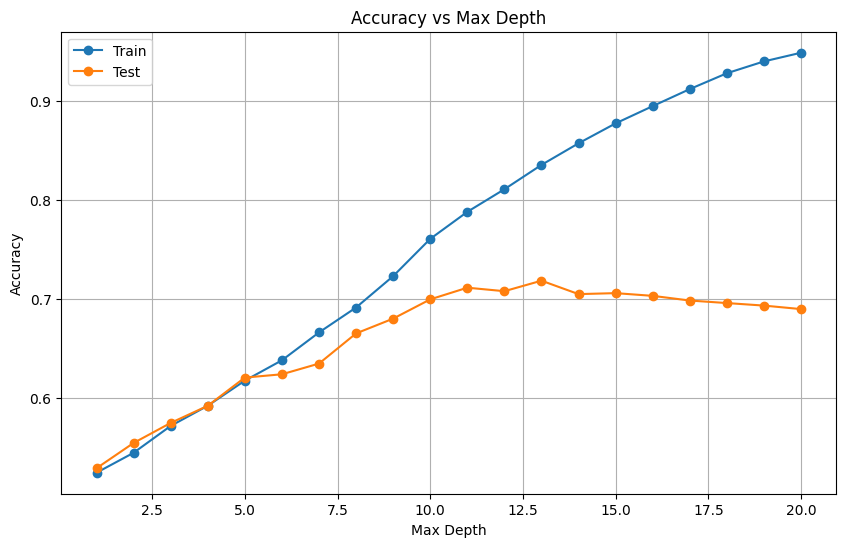

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize lists to store values
max_depth_values = range(1, 21)  # Adjust range as needed
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different max_depth values
for depth in max_depth_values:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot max_depth vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(node_counts,max_depth_values, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("Max Depth")
plt.title("Max Depth vs Number of Nodes")
plt.grid(True)
plt.show()

# Plot accuracy vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(max_depth_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()


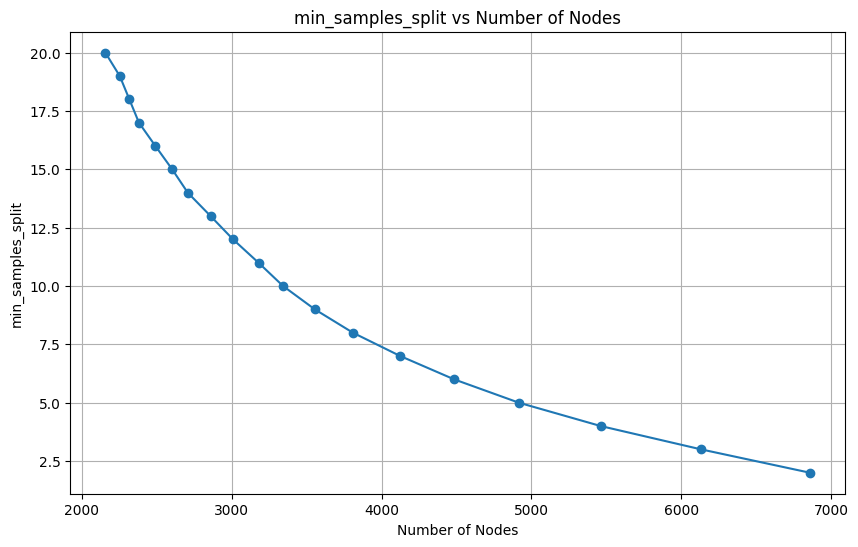

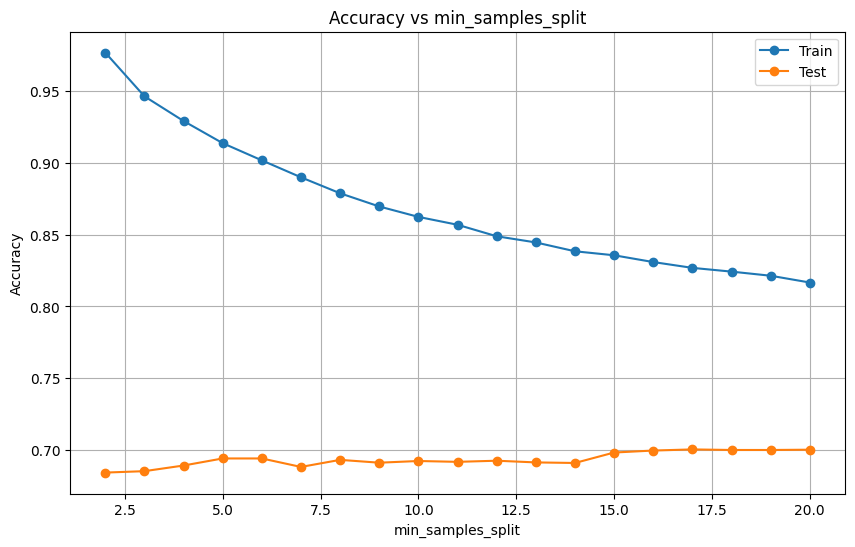

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define min_samples_split values
min_samples_split_values = range(2, 21)  # Adjust range as needed

# Initialize lists to store values
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different min_samples_split values
for min_samples_split in min_samples_split_values:
    clf = DecisionTreeClassifier(random_state=42, min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot min_samples_split vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(node_counts,min_samples_split_values, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("min_samples_split")
plt.title("min_samples_split vs Number of Nodes")
plt.grid(True)
plt.show()

# Plot accuracy vs min_samples_split
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(min_samples_split_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_split")
plt.legend()
plt.grid(True)
plt.show()


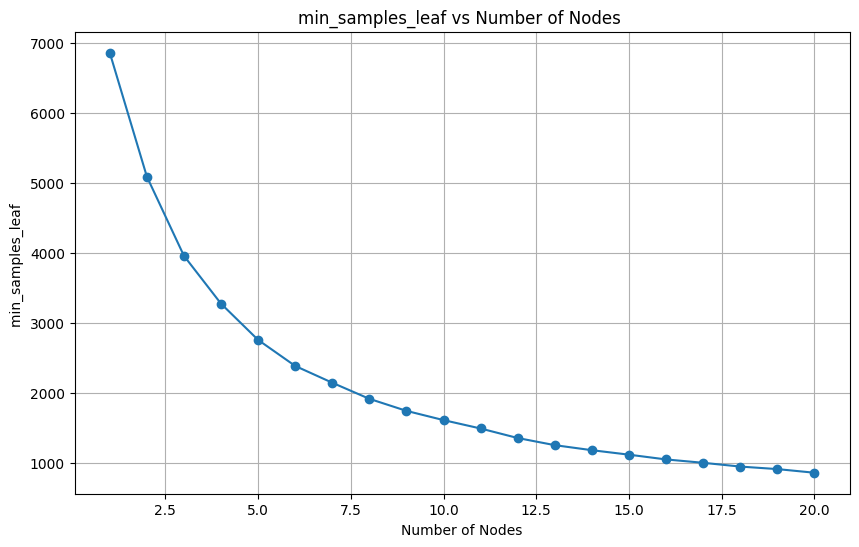

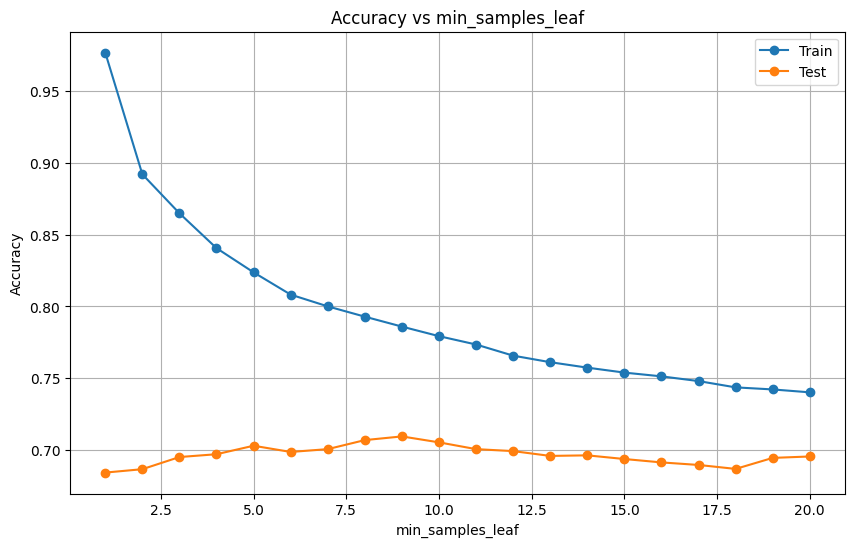

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define min_samples_leaf values
min_samples_leaf_values = range(1, 21)  # Adjust range as needed

# Initialize lists to store values
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot min_samples_leaf vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, node_counts, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("min_samples_leaf ")
plt.title("min_samples_leaf vs Number of Nodes ")
plt.grid(True)
plt.show()

# Plot accuracy vs min_samples_leaf
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(min_samples_leaf_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()


# Decision Trees --- Final Proj


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42, stratify=ranges_mosq_Y)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

def evaluate_multiclass_model(model, X_test, y_test):
    if hasattr(model, 'predict_proba'):
        # If the model has predict_proba method, it's a probabilistic classifier
        y_prob = model.predict_proba(X_test)
    else:
        # Otherwise, use decision function for probabilistic score
        y_prob = model.decision_function(X_test)

    y_pred = model.predict(X_test)
    n_classes = len(np.unique(y_test))

    # Compute one-hot encoding for y_test and y_pred
    y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_one_hot = label_binarize(y_pred, classes=np.unique(y_test))

    # Compute multiclass AUC-ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    tpr_macro = np.zeros_like(fpr_macro)
    for i in range(n_classes):
        tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
    tpr_macro /= n_classes
    roc_auc_macro = auc(fpr_macro, tpr_macro)

    # Compute accuracy, F1-score, precision, recall, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC ROC (Macro)': roc_auc_macro,
        'AUC ROC (Per Class)': roc_auc,
        'ROC Curve (Macro)': (fpr_macro, tpr_macro),
        'Confusion Matrix': conf_matrix
    }


In [ ]:
from collections import Counter
# Verify the class distribution
print("Class distribution before preprocessing:")
print(Counter(y_test))

Class distribution before preprocessing:
Counter({1: 1836, 2: 1836, 0: 1835})


In [ ]:
dt_params = {'max_depth': list(range(1,30,4)), 'min_samples_leaf': list(range(1,10,2)), 'min_samples_split': list(range(2,10,2))}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, verbose = 10, n_jobs=-1)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 9, 13, 17, 21, 25, 29],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=10)

In [ ]:
print(f"Decision Tree best params: {dt_grid.best_params_}")
dt_evaluation_r= evaluate_multiclass_model(dt_grid.best_estimator_, X_test, y_test)
print("Decision Tree Evaluation:", dt_evaluation_r)

Decision Tree best params: {'max_depth': 17, 'min_samples_leaf': 3, 'min_samples_split': 6}
Decision Tree Evaluation: {'Accuracy': 0.698020700926094, 'F1 Score': 0.6976340079677267, 'Precision': 0.6987399985931927, 'Recall': 0.6980274418779521, 'AUC ROC (Macro)': 0.8336254984239745, 'AUC ROC (Per Class)': {0: 0.8421213929107823, 1: 0.8200598045447182, 2: 0.8386746144930324}, 'ROC Curve (Macro)': (array([0.        , 0.03731953, 0.03813675, 0.04004358, 0.0405884 ,
       0.04167802, 0.04249523, 0.04304004, 0.04521929, 0.0460365 ,
       0.04656863, 0.04765795, 0.04793028, 0.04847495, 0.05010893,
       0.05038126, 0.05148461, 0.05202942, 0.05610022, 0.05691721,
       0.06319804, 0.06347044, 0.06374285, 0.06617647, 0.06673931,
       0.06701171, 0.06782893, 0.06891855, 0.07055298, 0.07109779,
       0.0713702 , 0.07271242, 0.07325708, 0.07352941, 0.07600109,
       0.0765459 , 0.07681831, 0.08226641, 0.08934895, 0.09152819,
       0.09289022, 0.09422658, 0.09558824, 0.09640523, 0.0991555

In [ ]:
best_dt_model = dt_grid.best_estimator_
feature_importances = best_dt_model.feature_importances_
n_features = X_train.shape[1]
for i, score in enumerate(sorted(feature_importances, reverse = True)):
    print(f"Feature {i}: Importance: {score}")

# # Additionally, you can access the feature importances for each tree in the grid search
# for i, tree in enumerate(dt_grid.best_estimator_.estimators_):
#     print(f"Tree {i+1} - Information Gain:")
#     for j in range(n_features):
#         print(f"  Feature {j}: Importance: {tree.feature_importances_[j]}")


Feature 0: Importance: 0.1906696485404357
Feature 1: Importance: 0.15365309573997069
Feature 2: Importance: 0.14500709046581456
Feature 3: Importance: 0.14153402141427107
Feature 4: Importance: 0.11166229929313425
Feature 5: Importance: 0.10446198707530384
Feature 6: Importance: 0.1025558592488115
Feature 7: Importance: 0.03850959576797062
Feature 8: Importance: 0.011946402454287722
Feature 9: Importance: 0.0


              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1835
           1       0.72      0.66      0.69      1836
           2       0.68      0.70      0.69      1836

    accuracy                           0.69      5507
   macro avg       0.69      0.69      0.69      5507
weighted avg       0.69      0.69      0.69      5507



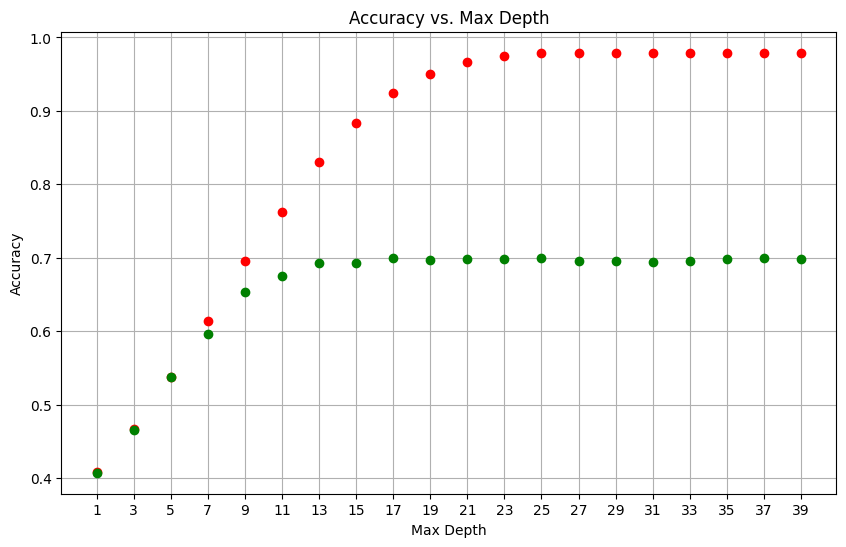

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depths = []
test_accuracies = []
train_accuracies = []
max_depth_values = range(1,40,2)

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # Predict on the test set
    y_pred = clf.predict(X_test)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    depths.append(max_depth)
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)
    if max_depth == 15:
      print(classification_report(y_test, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, 'ro')
plt.plot(depths, test_accuracies, 'go')
plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 250, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

feature_importance_dict = {feature: importance for feature, importance in zip(X_train.columns, feature_importances)}

sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

print(sorted_feature_importance)
print(list(sorted_feature_importance.keys()))

{'SITE_NAME': 0.1552722645709737, 'MOSQUITO_NUMBER': 0.14297078562015494, 'COUNTRY_NAME': 0.13053848603454501, 'ADMIN2': 0.12453059554555491, 'ADMIN1': 0.11946264169185311, 'SPECIES': 0.11874757608176645, 'INSECTICIDE_CONC': 0.10593798976919067, 'INSECTICIDE_TYPE': 0.0664861588749541, 'INSECTICIDE_CLASS': 0.03599381880390854, 'TEST_TYPE': 5.9683007098557925e-05}
['SITE_NAME', 'MOSQUITO_NUMBER', 'COUNTRY_NAME', 'ADMIN2', 'ADMIN1', 'SPECIES', 'INSECTICIDE_CONC', 'INSECTICIDE_TYPE', 'INSECTICIDE_CLASS', 'TEST_TYPE']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)

for i, score in enumerate(sorted(mi_scores, reverse = True)):
    print(f"Feature '{X_train.columns[i]}': Mutual Information Score = {score}")

Feature 'COUNTRY_NAME': Mutual Information Score = 0.20089045599930855
Feature 'INSECTICIDE_CLASS': Mutual Information Score = 0.2002525642001376
Feature 'ADMIN1': Mutual Information Score = 0.19830402940563174
Feature 'ADMIN2': Mutual Information Score = 0.19724756223767148
Feature 'SITE_NAME': Mutual Information Score = 0.18157880975822382
Feature 'INSECTICIDE_TYPE': Mutual Information Score = 0.12941405055224364
Feature 'INSECTICIDE_CONC': Mutual Information Score = 0.12789210228514936
Feature 'MOSQUITO_NUMBER': Mutual Information Score = 0.05741431272836395
Feature 'SPECIES': Mutual Information Score = 0.018025077163208447
Feature 'TEST_TYPE': Mutual Information Score = 0.0


In [ ]:
RF_importance = list(sorted_feature_importance.keys())
mi_scores_list = [X_train.columns[i] for i, _ in enumerate(sorted(mi_scores, reverse = True))]
print(RF_importance)
print(mi_scores_list)

['SITE_NAME', 'MOSQUITO_NUMBER', 'COUNTRY_NAME', 'ADMIN2', 'ADMIN1', 'SPECIES', 'INSECTICIDE_CONC', 'INSECTICIDE_TYPE', 'INSECTICIDE_CLASS', 'TEST_TYPE']
['COUNTRY_NAME', 'INSECTICIDE_CLASS', 'ADMIN1', 'ADMIN2', 'SITE_NAME', 'INSECTICIDE_TYPE', 'INSECTICIDE_CONC', 'MOSQUITO_NUMBER', 'SPECIES', 'TEST_TYPE']


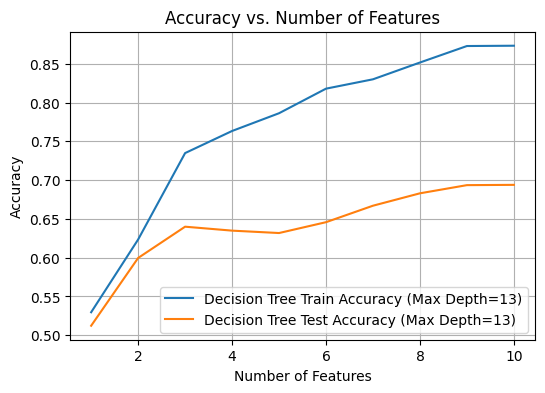

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(max_depth=15),
    }

    max_features = range(1, len(mi_scores_list) + 1)
    results = {num_features: {classifier_name: {'classification_report': '', 'train_acc': [], 'test_acc': []} for classifier_name in classifiers} for num_features in max_features}

    for num_features in max_features:
        for classifier_name, classifier in classifiers.items():
            selected_features = mi_scores_list[:num_features]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            classifier.fit(X_train_selected, y_train)
            train_acc = classifier.score(X_train_selected, y_train)
            test_acc = classifier.score(X_test_selected, y_test)
            results[num_features][classifier_name]['train_acc'].append(train_acc)
            results[num_features][classifier_name]['test_acc'].append(test_acc)

            y_pred = classifier.predict(X_test_selected)
            report = classification_report(y_test, y_pred)
            results[num_features][classifier_name]['classification_report'] = report

    # Plotting
    plt.figure(figsize=(6, 4))
    for classifier_name in classifiers:
        train_accs = [results[num_features][classifier_name]['train_acc'][-1] for num_features in max_features]
        test_accs = [results[num_features][classifier_name]['test_acc'][-1] for num_features in max_features]
        plt.plot(max_features, train_accs, label=f'{classifier_name} Train Accuracy (Max Depth=13)')
        plt.plot(max_features, test_accs, label=f'{classifier_name} Test Accuracy (Max Depth=13)')

    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

results_mi = compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list)

In [ ]:
print(results_mi[7]["Decision Tree"]['classification_report'])

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1835
           1       0.70      0.61      0.65      1836
           2       0.63      0.71      0.67      1836

    accuracy                           0.67      5507
   macro avg       0.67      0.67      0.67      5507
weighted avg       0.67      0.67      0.67      5507



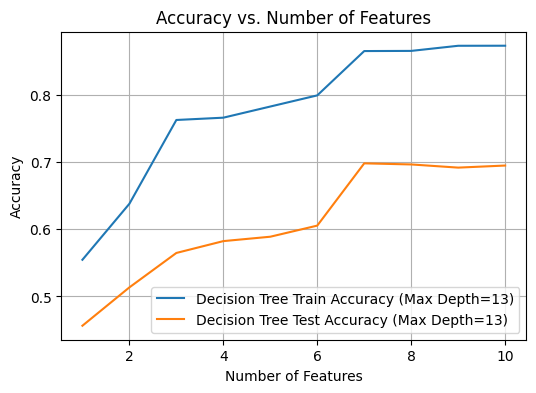

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, RF_importance):
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(max_depth=15),
    }

    max_features = range(1, len(RF_importance) + 1)
    results = {num_features: {classifier_name: {'classification_report': '', 'train_acc': [], 'test_acc': []} for classifier_name in classifiers} for num_features in max_features}

    for num_features in max_features:
        for classifier_name, classifier in classifiers.items():
            selected_features = RF_importance[:num_features]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            classifier.fit(X_train_selected, y_train)
            train_acc = classifier.score(X_train_selected, y_train)
            test_acc = classifier.score(X_test_selected, y_test)
            results[num_features][classifier_name]['train_acc'].append(train_acc)
            results[num_features][classifier_name]['test_acc'].append(test_acc)

            y_pred = classifier.predict(X_test_selected)
            report = classification_report(y_test, y_pred)
            results[num_features][classifier_name]['classification_report'] = report

    # Plotting
    plt.figure(figsize=(6, 4))
    for classifier_name in classifiers:
        train_accs = [results[num_features][classifier_name]['train_acc'][-1] for num_features in max_features]
        test_accs = [results[num_features][classifier_name]['test_acc'][-1] for num_features in max_features]
        plt.plot(max_features, train_accs, label=f'{classifier_name} Train Accuracy (Max Depth=13)')
        plt.plot(max_features, test_accs, label=f'{classifier_name} Test Accuracy (Max Depth=13)')

    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

results_rf = compare_feature_selection(X_train, X_test, y_train, y_test, RF_importance)

In [ ]:
print(results_rf[7]["Decision Tree"]['classification_report'])

              precision    recall  f1-score   support

           0       0.68      0.75      0.72      1835
           1       0.72      0.64      0.67      1836
           2       0.70      0.71      0.70      1836

    accuracy                           0.70      5507
   macro avg       0.70      0.70      0.70      5507
weighted avg       0.70      0.70      0.70      5507



In [ ]:
# Applying PCA to reduce dimensionality while retaining 95% of the variance
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
ranges_mosq_X_pca = pca.fit_transform(ranges_mosq_X)

# The number of components chosen by PCA
n_components = pca.n_components_
print(f"PCA reduced the feature space to {n_components} components.")

# Get the selected components
selected_components = pca.components_

# Get the names of the original features
feature_names = ranges_mosq_X.columns

# Loop through each principal component to find the top features
for i, component in enumerate(selected_components):
    print(f"Top features for Principal Component {i+1}:")
    # Sort the indices of the features by their absolute coefficient values
    top_feature_indices = sorted(range(len(component)), key=lambda x: abs(component[x]), reverse=True)
    # Print the names of the top features
    for idx in top_feature_indices:
        print(f"{feature_names[idx]}: {component[idx]}")
    print()

PCA reduced the feature space to 2 components.
Top features for Principal Component 1:
SITE_NAME: 0.9873869934482601
ADMIN2: 0.1583250738442632
ADMIN1: -0.0002803382833377957
COUNTRY_NAME: 8.42394577914165e-05
SPECIES: -7.733714091362964e-05
INSECTICIDE_CLASS: 5.684173597794009e-05
INSECTICIDE_TYPE: -3.3500839282910674e-05
INSECTICIDE_CONC: -1.18763862528542e-05
MOSQUITO_NUMBER: -4.4698453846341807e-07
TEST_TYPE: 6.781690971282e-08

Top features for Principal Component 2:
ADMIN2: -0.9873390310874008
SITE_NAME: 0.1583149534408436
ADMIN1: -0.009542755482619097
SPECIES: 0.0024020315581905647
COUNTRY_NAME: -0.0010794365818942438
INSECTICIDE_TYPE: -0.00010558432653864889
INSECTICIDE_CLASS: -5.342966452595934e-05
INSECTICIDE_CONC: -9.131054276162872e-06
MOSQUITO_NUMBER: 1.0539510806410864e-06
TEST_TYPE: -9.56897936041839e-08



In [ ]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(ranges_mosq_X_pca, ranges_mosq_Y, test_size=0.30, random_state=42, stratify=ranges_mosq_Y)
X_train_p

array([[ -961.05163132,   338.83219126],
       [  830.34671118,   705.87215126],
       [ 1459.20798236,   450.6933644 ],
       ...,
       [ -836.10476656,   240.6868726 ],
       [-1648.76560219,   584.52435984],
       [ 1403.53353746,  -486.46054579]])

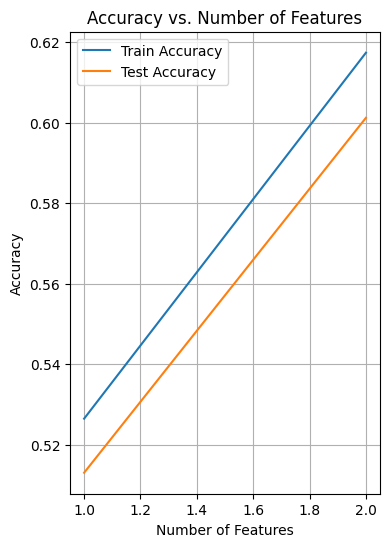

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, classifier):
    classifiers = {
        "DT": DecisionTreeClassifier(max_depth=15),
    }

    max_features = range(1, X_train_p.shape[1] + 1)
    results = {classifier: {num_features: {"selected_features": None, "test": None, 'train': None, 'classification_report': None} for num_features in max_features} for classifier in classifiers}

    for num_features in max_features:
        for classifier_name, clf in classifiers.items():
            clf.fit(X_train.iloc[:, :num_features], y_train)
            train_acc = clf.score(X_train.iloc[:, :num_features], y_train)
            test_acc = clf.score(X_test.iloc[:, :num_features], y_test)
            results[classifier_name][num_features]["test"] = test_acc
            results[classifier_name][num_features]["train"] = train_acc
            # Get feature names
            selected_feature_names = X_train.columns[:num_features]
            results[classifier_name][num_features]["selected_features"] = selected_feature_names
            # Generate classification report
            y_pred = clf.predict(X_test.iloc[:, :num_features])
            report = classification_report(y_test, y_pred)
            results[classifier_name][num_features]["classification_report"] = report

    plt.figure(figsize=(4, 6))
    for classifier_name, data in results.items():
        test_accuracies = [data[num_features]["test"] for num_features in max_features]
        train_accuracies = [data[num_features]["train"] for num_features in max_features]
        plt.plot(list(max_features), train_accuracies, label='Train Accuracy')
        plt.plot(list(max_features), test_accuracies, label='Test Accuracy')

    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

results_pca = compare_feature_selection(X_train, X_test, y_train, y_test, "DT")

In [ ]:
print(results_pca['DT'][2]["classification_report"])

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1835
           1       0.57      0.39      0.46      1836
           2       0.62      0.68      0.64      1836

    accuracy                           0.60      5507
   macro avg       0.60      0.60      0.59      5507
weighted avg       0.60      0.60      0.59      5507



# SVM (Linear)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42, stratify=ranges_mosq_Y)

In [ ]:
# Verify the class distribution
print("Class distribution before preprocessing:")
print(Counter(y_test))

Class distribution before preprocessing:
Counter({1: 1836, 2: 1836, 0: 1835})


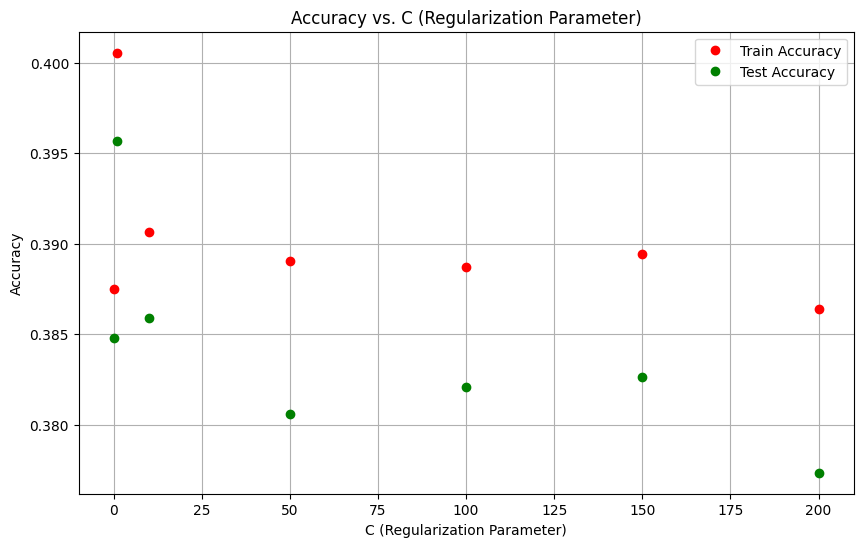

In [ ]:
import cupy as cp
from cuml.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def train_linear_svm(X_train, X_test, y_train, y_test, C_values):
    # Convert pandas dataframes to CuPy arrays
    X_train_cupy = cp.asarray(X_train.values)
    X_test_cupy = cp.asarray(X_test.values)
    y_train_cupy = cp.asarray(y_train.values.ravel())
    y_test_cupy = cp.asarray(y_test.values.ravel())

    # Dictionary to store classification reports
    classification_reports = {}

    # Lists to store results
    Cs = []
    test_accuracies = []
    train_accuracies = []

    for C in C_values:
        # Create and fit the LinearSVC model with GPU acceleration
        svm_model = LinearSVC(C=C)
        svm_model.fit(X_train_cupy, y_train_cupy)

        # Predict on the test set
        y_pred_cupy = svm_model.predict(X_test_cupy).get()

        # Calculate accuracy on train and test sets
        train_acc = accuracy_score(y_train_cupy.get(), svm_model.predict(X_train_cupy).get())
        test_acc = accuracy_score(y_test_cupy.get(), y_pred_cupy)

        # Generate classification report
        report = classification_report(y_test_cupy.get(), y_pred_cupy)

        # Store classification report in the dictionary
        classification_reports[C] = report

        # Append values to lists
        Cs.append(C)
        test_accuracies.append(test_acc)
        train_accuracies.append(train_acc)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(Cs, train_accuracies, 'ro', label='Train Accuracy')
    plt.plot(Cs, test_accuracies, 'go', label='Test Accuracy')
    plt.title('Accuracy vs. C (Regularization Parameter)')
    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return classification_reports

# Usage example:
result = train_linear_svm(X_train, X_test, y_train, y_test, [0.1, 1, 10, 50, 100, 150, 200])

In [ ]:
print(result[0.1])

              precision    recall  f1-score   support

           0       0.39      0.50      0.44      1835
           1       0.35      0.15      0.21      1836
           2       0.39      0.51      0.44      1836

    accuracy                           0.38      5507
   macro avg       0.38      0.38      0.36      5507
weighted avg       0.38      0.38      0.36      5507



In [ ]:
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12==24.4.* dask-cudf-cu12==24.4.* cuml-cu12==24.4.* \
    cugraph-cu12==24.4.* cuspatial-cu12==24.4.* cuproj-cu12==24.4.* \
    cuxfilter-cu12==24.4.* cucim-cu12==24.4.* pylibraft-cu12==24.4.* \
    raft-dask-cu12==24.4.* cuvs-cu12==24.4.*

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.9/920.9 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.6/616.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.6/126.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 250, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

feature_importance_dict = {feature: importance for feature, importance in zip(X_train.columns, feature_importances)}

sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

print(sorted_feature_importance)
print(list(sorted_feature_importance.keys()))

{'SITE_NAME': 0.1565384640512397, 'MOSQUITO_NUMBER': 0.14535855297454975, 'ADMIN2': 0.12598880556272946, 'COUNTRY_NAME': 0.12568556077858845, 'ADMIN1': 0.1209358764121194, 'SPECIES': 0.1191476387133291, 'INSECTICIDE_CONC': 0.10312310493193591, 'INSECTICIDE_TYPE': 0.07039580710774766, 'INSECTICIDE_CLASS': 0.03277236885866093, 'TEST_TYPE': 5.382060909975511e-05}
['SITE_NAME', 'MOSQUITO_NUMBER', 'ADMIN2', 'COUNTRY_NAME', 'ADMIN1', 'SPECIES', 'INSECTICIDE_CONC', 'INSECTICIDE_TYPE', 'INSECTICIDE_CLASS', 'TEST_TYPE']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)

for i, score in enumerate(sorted(mi_scores, reverse = True)):
    print(f"Feature '{X_train.columns[i]}': Mutual Information Score = {score}")

Feature 'COUNTRY_NAME': Mutual Information Score = 0.20520587284164926
Feature 'INSECTICIDE_CLASS': Mutual Information Score = 0.20220588236773218
Feature 'ADMIN1': Mutual Information Score = 0.20119724877492584
Feature 'ADMIN2': Mutual Information Score = 0.1904576101632105
Feature 'SITE_NAME': Mutual Information Score = 0.1794434910589462
Feature 'INSECTICIDE_TYPE': Mutual Information Score = 0.1336515274102088
Feature 'INSECTICIDE_CONC': Mutual Information Score = 0.1254125535227797
Feature 'MOSQUITO_NUMBER': Mutual Information Score = 0.06000709825935613
Feature 'SPECIES': Mutual Information Score = 0.018866402964838436
Feature 'TEST_TYPE': Mutual Information Score = 0.007509070041539001


In [ ]:
RF_importance = list(sorted_feature_importance.keys())
mi_scores_list = [X_train.columns[i] for i, _ in enumerate(sorted(mi_scores, reverse = True))]
print(RF_importance)
print(mi_scores_list)

['SITE_NAME', 'MOSQUITO_NUMBER', 'ADMIN2', 'COUNTRY_NAME', 'ADMIN1', 'SPECIES', 'INSECTICIDE_CONC', 'INSECTICIDE_TYPE', 'INSECTICIDE_CLASS', 'TEST_TYPE']
['COUNTRY_NAME', 'INSECTICIDE_CLASS', 'ADMIN1', 'ADMIN2', 'SITE_NAME', 'INSECTICIDE_TYPE', 'INSECTICIDE_CONC', 'MOSQUITO_NUMBER', 'SPECIES', 'TEST_TYPE']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


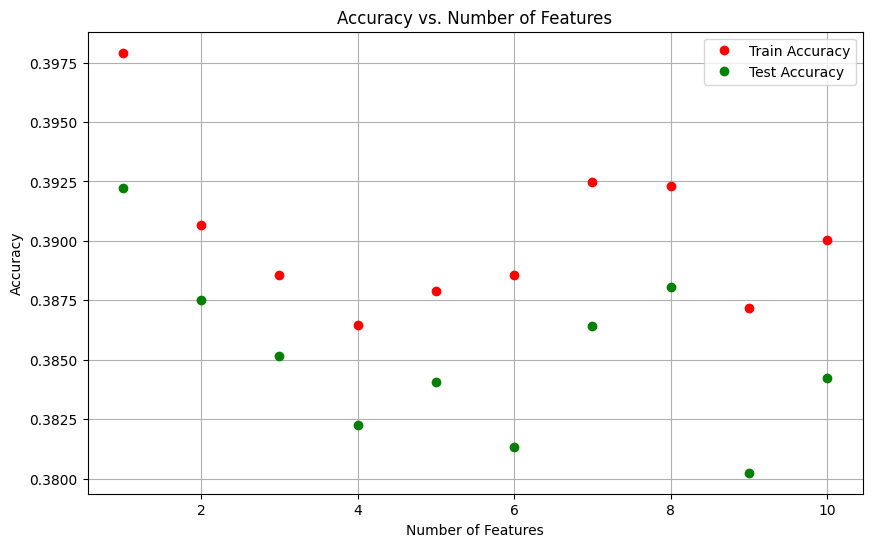

In [ ]:
import cupy as cp
from cuml.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    # Convert pandas dataframes to CuPy arrays
    X_train_cupy = cp.asarray(X_train.values)
    X_test_cupy = cp.asarray(X_test.values)
    y_train_cupy = cp.asarray(y_train.values.ravel())
    y_test_cupy = cp.asarray(y_test.values.ravel())

    # Convert column names to column indices
    selected_feature_indices = [X_train.columns.get_loc(feature) for feature in mi_scores_list]

    # Dictionary to store classification reports
    classification_reports = {}

    # Lists to store results
    max_features = range(1, len(selected_feature_indices) + 1)
    test_accuracies = []
    train_accuracies = []

    for num_features in max_features:
        selected_indices = selected_feature_indices[:num_features]
        X_train_selected = X_train_cupy[:, selected_indices]
        X_test_selected = X_test_cupy[:, selected_indices]

        # Create and fit the LinearSVC model with GPU acceleration
        svm_model = LinearSVC(C=0.1)
        svm_model.fit(X_train_selected, y_train_cupy)

        # Predict on the test set
        y_pred_cupy = svm_model.predict(X_test_selected).get()

        # Calculate accuracy on train and test sets
        train_acc = accuracy_score(y_train_cupy.get(), svm_model.predict(X_train_selected).get())
        test_acc = accuracy_score(y_test_cupy.get(), y_pred_cupy)

        # Generate classification report
        report = classification_report(y_test_cupy.get(), y_pred_cupy)

        # Store classification report in the dictionary
        classification_reports[num_features] = report

        # Append values to lists
        test_accuracies.append(test_acc)
        train_accuracies.append(train_acc)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(max_features, train_accuracies, 'ro', label='Train Accuracy')
    plt.plot(max_features, test_accuracies, 'go', label='Test Accuracy')
    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return classification_reports

# Usage example:
result_f = compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list)

In [ ]:
print(result_f[1])

              precision    recall  f1-score   support

           0       0.39      0.60      0.47      1835
           1       0.00      0.00      0.00      1836
           2       0.39      0.57      0.47      1836

    accuracy                           0.39      5507
   macro avg       0.26      0.39      0.31      5507
weighted avg       0.26      0.39      0.31      5507



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


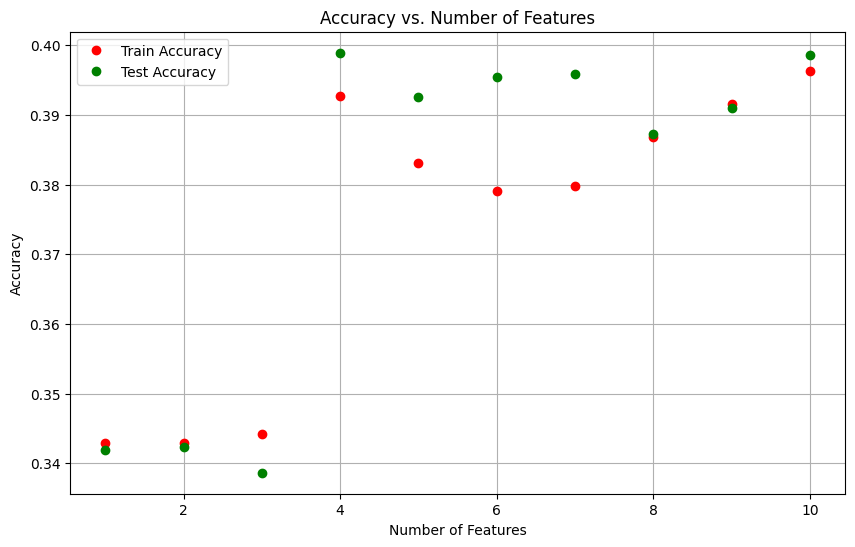

In [ ]:
import cupy as cp
from cuml.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    # Convert pandas dataframes to CuPy arrays
    X_train_cupy = cp.asarray(X_train.values)
    X_test_cupy = cp.asarray(X_test.values)
    y_train_cupy = cp.asarray(y_train.values.ravel())
    y_test_cupy = cp.asarray(y_test.values.ravel())

    # Convert column names to column indices
    selected_feature_indices = [X_train.columns.get_loc(feature) for feature in mi_scores_list]

    # Dictionary to store classification reports
    classification_reports = {}

    # Lists to store results
    max_features = range(1, len(selected_feature_indices) + 1)
    test_accuracies = []
    train_accuracies = []

    for num_features in max_features:
        selected_indices = selected_feature_indices[:num_features]
        X_train_selected = X_train_cupy[:, selected_indices]
        X_test_selected = X_test_cupy[:, selected_indices]

        # Create and fit the LinearSVC model with GPU acceleration
        svm_model = LinearSVC(C=0.1)
        svm_model.fit(X_train_selected, y_train_cupy)

        # Predict on the test set
        y_pred_cupy = svm_model.predict(X_test_selected).get()

        # Calculate accuracy on train and test sets
        train_acc = accuracy_score(y_train_cupy.get(), svm_model.predict(X_train_selected).get())
        test_acc = accuracy_score(y_test_cupy.get(), y_pred_cupy)

        # Generate classification report
        report = classification_report(y_test_cupy.get(), y_pred_cupy)

        # Store classification report in the dictionary
        classification_reports[num_features] = report

        # Append values to lists
        test_accuracies.append(test_acc)
        train_accuracies.append(train_acc)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(max_features, train_accuracies, 'ro', label='Train Accuracy')
    plt.plot(max_features, test_accuracies, 'go', label='Test Accuracy')
    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return classification_reports

# Usage example:
result_f = compare_feature_selection(X_train, X_test, y_train, y_test, RF_importance)

In [ ]:
print(result_f[10])

              precision    recall  f1-score   support

           0       0.41      0.45      0.43      1835
           1       0.37      0.24      0.29      1836
           2       0.41      0.51      0.45      1836

    accuracy                           0.40      5507
   macro avg       0.39      0.40      0.39      5507
weighted avg       0.39      0.40      0.39      5507



In [ ]:
# Applying PCA to reduce dimensionality while retaining 95% of the variance
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
ranges_mosq_X_pca = pca.fit_transform(ranges_mosq_X)

# The number of components chosen by PCA
n_components = pca.n_components_
print(f"PCA reduced the feature space to {n_components} components.")

# Get the selected components
selected_components = pca.components_

# Get the names of the original features
feature_names = ranges_mosq_X.columns

# Loop through each principal component to find the top features
for i, component in enumerate(selected_components):
    print(f"Top features for Principal Component {i+1}:")
    # Sort the indices of the features by their absolute coefficient values
    top_feature_indices = sorted(range(len(component)), key=lambda x: abs(component[x]), reverse=True)
    # Print the names of the top features
    for idx in top_feature_indices:
        print(f"{feature_names[idx]}: {component[idx]}")
    print()

PCA reduced the feature space to 2 components.
Top features for Principal Component 1:
SITE_NAME: 0.9873869934482601
ADMIN2: 0.1583250738442632
ADMIN1: -0.0002803382833377957
COUNTRY_NAME: 8.42394577914165e-05
SPECIES: -7.733714091362964e-05
INSECTICIDE_CLASS: 5.684173597794009e-05
INSECTICIDE_TYPE: -3.3500839282910674e-05
INSECTICIDE_CONC: -1.18763862528542e-05
MOSQUITO_NUMBER: -4.4698453846341807e-07
TEST_TYPE: 6.781690971282e-08

Top features for Principal Component 2:
ADMIN2: -0.9873390310874008
SITE_NAME: 0.1583149534408436
ADMIN1: -0.009542755482619097
SPECIES: 0.0024020315581905647
COUNTRY_NAME: -0.0010794365818942438
INSECTICIDE_TYPE: -0.00010558432653864889
INSECTICIDE_CLASS: -5.342966452595934e-05
INSECTICIDE_CONC: -9.131054276162872e-06
MOSQUITO_NUMBER: 1.0539510806410864e-06
TEST_TYPE: -9.56897936041839e-08



In [ ]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(ranges_mosq_X_pca, ranges_mosq_Y, test_size=0.30, random_state=42, stratify=ranges_mosq_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


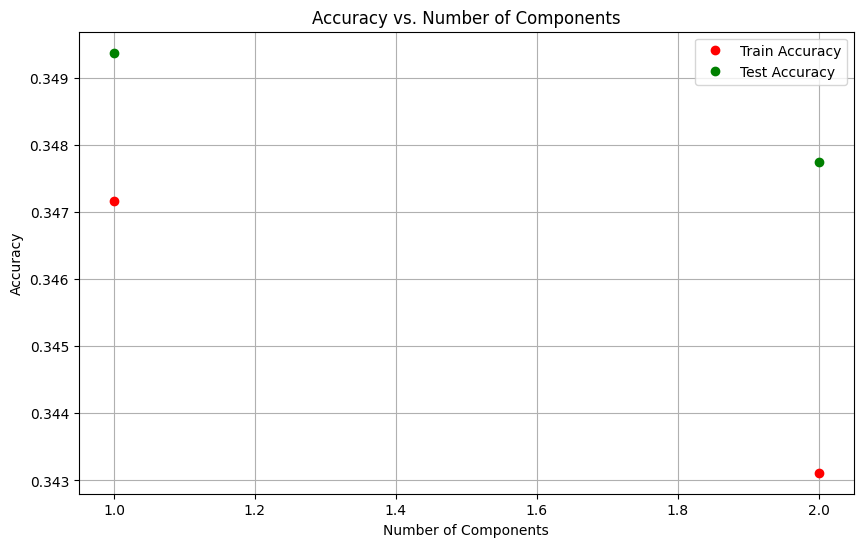

In [ ]:
import numpy as np
from cuml.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test):
    # Dictionary to store classification reports
    classification_reports = {}

    # Lists to store results
    max_components = range(1, X_train.shape[1] + 1)
    test_accuracies = []
    train_accuracies = []

    for num_components in max_components:
        X_train_selected = X_train[:, :num_components]
        X_test_selected = X_test[:, :num_components]

        # Create and fit the LinearSVC model with GPU acceleration
        svm_model = LinearSVC(C=10)
        svm_model.fit(X_train_selected, y_train)

        # Predict on the test set
        y_pred = svm_model.predict(X_test_selected)

        # Calculate accuracy on train and test sets
        train_acc = accuracy_score(y_train, svm_model.predict(X_train_selected))
        test_acc = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)

        # Store classification report in the dictionary
        classification_reports[num_components] = report

        # Append values to lists
        test_accuracies.append(test_acc)
        train_accuracies.append(train_acc)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(max_components, train_accuracies, 'ro', label='Train Accuracy')
    plt.plot(max_components, test_accuracies, 'go', label='Test Accuracy')
    plt.title('Accuracy vs. Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return classification_reports

# Usage example:
result_fpca = compare_feature_selection(X_train_p, X_test_p, y_train_p, y_test_p)

In [ ]:
print(result_fpca[2])

              precision    recall  f1-score   support

           0       0.35      0.43      0.38      1835
           1       0.35      0.34      0.34      1836
           2       0.35      0.28      0.31      1836

    accuracy                           0.35      5507
   macro avg       0.35      0.35      0.34      5507
weighted avg       0.35      0.35      0.34      5507

